In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
data = pd.read_csv('SalaryData_Train.csv')

In [3]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(30161, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
objData = data.select_dtypes('object')

In [7]:
objData

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [8]:
objData.nunique()

workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
native           40
Salary            2
dtype: int64

In [9]:
objData.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [10]:
objData.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [11]:
data.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [12]:
ed=data.education.unique()
grad = {'1st-4th':'School','5th-6th':'School','7th-8th':'School','9th':'School','10th':'School',
       '11th':'HighSchool','HS-grad':'HighSchool','Bachelors':'UG','Preschool':'School',
       'Doctorate':'PHD','Some-college':'UG','Masters':'PG','Assoc-voc':'AV','Assoc-acdm':'AA',
       'Prof-school':'School'}

print(ed)


grad = {ed[0]:'UG',ed[1]:'HighSchool',ed[2]:'HighSchool',ed[3]:'PG',ed[4]:'School',ed[5]:'HighSchool'
       ,ed[6]:'AA',ed[7]:'School',ed[8]:'Ph.D',ed[9]:'AV',ed[10]:'HighSchool',ed[11]:'School',
       ed[12]:'School',ed[13]:'School',ed[14]:'School',ed[15]:'HighSchool'}

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


In [13]:
data['education'] = data['education'].map(grad)

In [14]:
data.education.value_counts()

HighSchool    18258
UG             5044
School         2542
PG             1627
AV             1307
AA             1008
Ph.D            375
Name: education, dtype: int64

In [15]:
print('WorkClass\n',data.workclass.value_counts())
print('\n Education\n',data.education.value_counts())
print('\n Martial Status\n',data.maritalstatus.value_counts())
print('\n Occupation\n',data.occupation.value_counts())
print('\n Relationship\n',data.relationship.value_counts())
print('\n Race\n',data.race.value_counts())
print('\n Sex\n',data.sex.value_counts())
print('\n Native Country\n',data.native.value_counts())
print('\n Salary\n',data.Salary.value_counts())

WorkClass
  Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

 Education
 HighSchool    18258
UG             5044
School         2542
PG             1627
AV             1307
AA             1008
Ph.D            375
Name: education, dtype: int64

 Martial Status
  Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

 Occupation
  Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912


In [16]:
data['Salary'] = LabelEncoder().fit_transform(data['Salary'])

In [17]:
data['sex'] = LabelEncoder().fit_transform(data['sex'])

In [18]:
data['race'] = LabelEncoder().fit_transform(data['race'])

In [19]:
data['relationship'] = LabelEncoder().fit_transform(data['relationship'])

In [20]:
data['education'] = LabelEncoder().fit_transform(data['education'])

In [21]:
data['maritalstatus'] = LabelEncoder().fit_transform(data['maritalstatus'])

In [22]:
data['workclass'] = LabelEncoder().fit_transform(data['workclass'])

In [23]:
data['occupation'] = LabelEncoder().fit_transform(data['occupation'])

In [24]:
data['native'] = LabelEncoder().fit_transform(data['native'])

In [25]:
ss = StandardScaler().fit_transform(data.drop('Salary',1))

In [26]:
Salary = pd.DataFrame(ss,columns = data.columns[:-1])

In [27]:
Salary['salary'] = data.Salary

In [28]:
Salary.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,0.042779,2.935947,1.819075,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358,0
1,0.880261,1.887645,1.819075,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358,0
2,-0.033356,-0.208958,-0.520888,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358,0
3,1.108665,-0.208958,-0.520888,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358,0
4,-0.794703,-0.208958,1.819075,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965,0
5,-0.109491,-0.208958,0.064102,1.521056,-0.387243,-0.734533,2.236683,0.385055,-1.443479,-0.147447,-0.218508,-0.077735,0.266358,0
6,0.804126,-0.208958,1.234084,-2.008363,0.280317,0.258130,-0.261233,-2.010994,-1.443479,-0.147447,-0.218508,-2.081077,-2.419859,0
7,1.032530,1.887645,-0.520888,-0.439733,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,0.339627,0.266358,1
8,-0.566299,-0.208958,0.064102,1.521056,0.947877,0.754461,-0.261233,0.385055,-1.443479,1.754166,-0.218508,0.756990,0.266358,1
9,0.271183,-0.208958,1.819075,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,0.551683,-0.218508,-0.077735,0.266358,1


In [29]:
cor = Salary.drop('salary',1).corr()

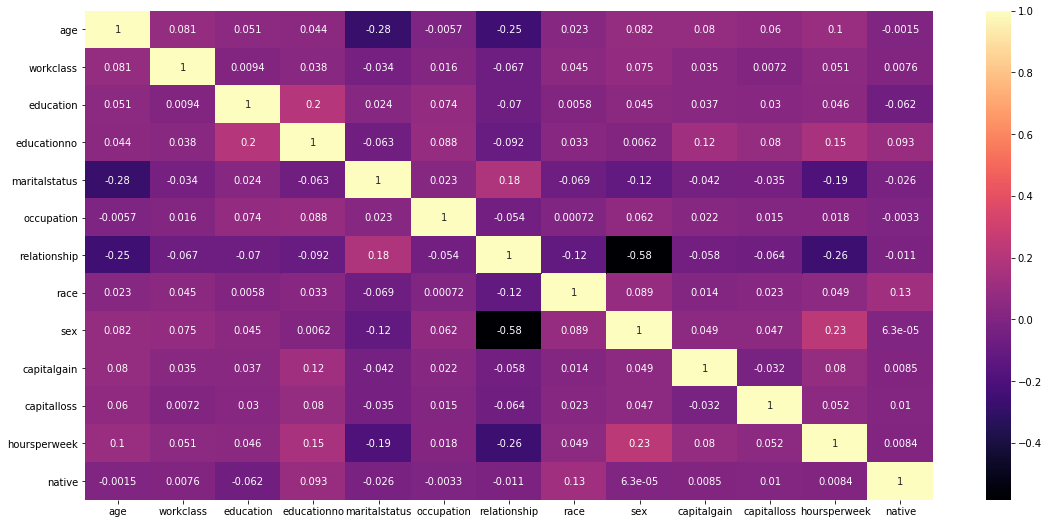

In [30]:
plt.figure(figsize=(19,9))

sns.heatmap(cor,annot=True,cmap='magma')

plt.show()

In [31]:
cor[cor>0.6]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workclass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educationno,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalstatus,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
capitalgain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [32]:
correlated = list()

for i in range(len(cor)):
    for j in range(i):
        if(abs(cor.iloc[i,j])>0.6):
            correlated.append(cor[i])
        
correlated
        

[]

In [33]:
X,xTest, Y,yTest= train_test_split(Salary.drop('salary',1),Salary.salary,test_size=0.2)

In [34]:
xTrain,yTrain = SMOTE(k_neighbors=4).fit_sample(X,Y)

In [35]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy')

rfe = RFECV(estimator=rf,step=1,scoring='accuracy')
rfe.fit(xTrain,yTrain)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='entropy',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [36]:
# use to show how many columns are not good for the model 
print(np.where(rfe.support_ == False)[0])

[]


In [37]:
rfe.n_features_

13

In [38]:
rfe.grid_scores_

array([0.77063683, 0.79927854, 0.83479897, 0.83283791, 0.84496319,
       0.85065322, 0.86689425, 0.87692069, 0.87617488, 0.88244489,
       0.88479266, 0.88680904, 0.88935015])

In [39]:
svm = SVC().fit(xTrain,yTrain)

In [40]:
pred = svm.predict(xTest)

In [41]:
svm.score(xTrain,yTrain)

0.8348525024859131

In [42]:
svm.score(xTest,yTest)

0.7848499917122493

In [43]:
accuracy_score(yTest,pred)

0.7848499917122493

In [44]:
confusion_matrix(yTest,pred)

array([[3448, 1103],
       [ 195, 1287]])